Import the necessary Libraries and the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the dataset
file_path = "C:/Users/James Ga-as/Downloads/dinosaurs.csv"
dinosaurs_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
dinosaurs_df


,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


In [3]:
# Find the biggest and smallest dinosaur in the dataset
Largest_dinosaur = dinosaurs_df.loc[dinosaurs_df['length_m'].idxmax()]
smallest_dinosaur = dinosaurs_df.loc[dinosaurs_df['length_m'].idxmin()]

# Extract the required information
biggest_dinosaur_info = {
    'name': Largest_dinosaur['name'],
    'length_m': Largest_dinosaur['length_m'],
    'diet': Largest_dinosaur['diet']
}

smallest_dinosaur_info = {
    'name': smallest_dinosaur['name'],
    'length_m': smallest_dinosaur['length_m'],
    'diet': smallest_dinosaur['diet']
}

biggest_dinosaur_info, smallest_dinosaur_info

({'name': 'Supersaurus', 'length_m': 35.0, 'diet': 'herbivorous'},
 {'name': 'Shanag', 'length_m': 0.45, 'diet': 'carnivorous'})

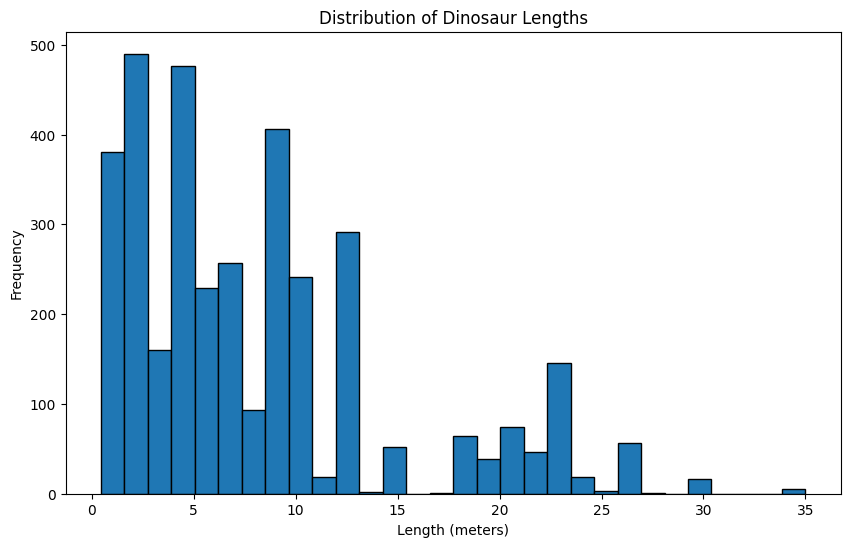

In [4]:
# 1. What is the distribution of dinosaur lengths?
plt.figure(figsize=(10, 6))
plt.hist(dinosaurs_df['length_m'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Dinosaur Lengths')
plt.xlabel('Length (meters)')
plt.ylabel('Frequency')
plt.show()


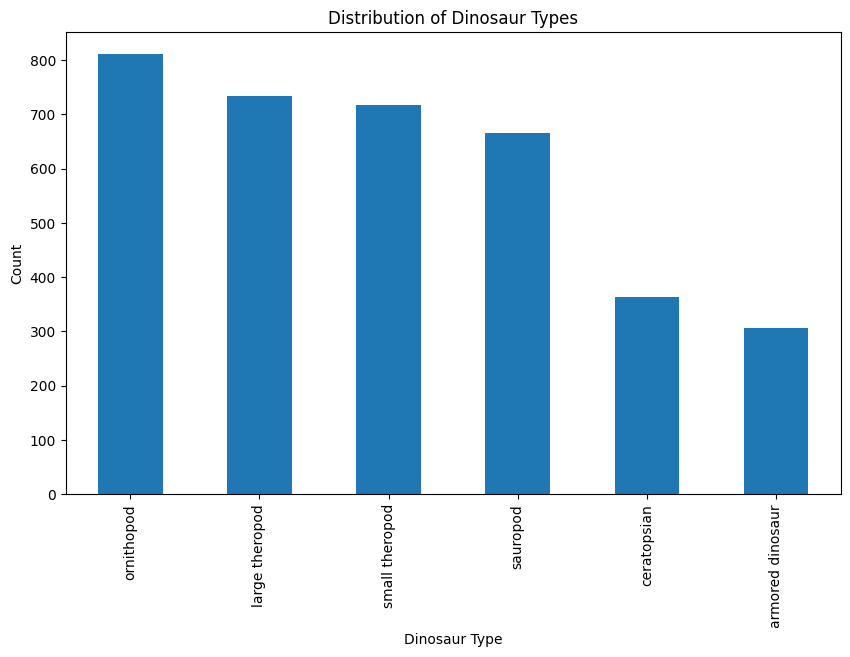

In [5]:
# 2. What is the distribution of dinosaur types?
plt.figure(figsize=(10, 6))
dinosaurs_df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Dinosaur Types')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.show()

C:\Users\James Ga-as\AppData\Local\Temp\ipykernel_20668\204499431.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


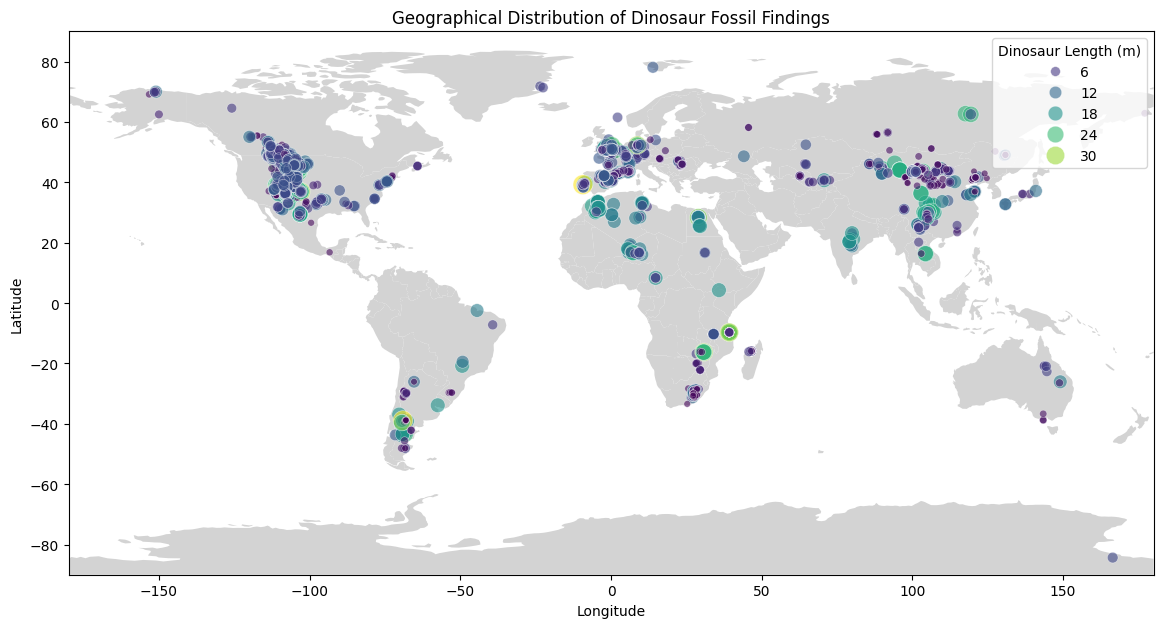

In [6]:
# 3. What is the geographical distribution of dinosaur fossil findings?

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.figure(figsize=(14, 8))

# Plot the world map
world.plot(ax=plt.gca(), color='lightgrey')

# Use a scatter plot with a color map to visualize density
sns.scatterplot(
    x='lng', y='lat', 
    hue='length_m', size='length_m', 
    sizes=(20, 200), alpha=0.6, 
    palette='viridis', data=dinosaurs_df
)

plt.title('Geographical Distribution of Dinosaur Fossil Findings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)  # Fix the x-axis to range from -180 to 180 degrees
plt.ylim(-90, 90)    # Fix the y-axis to range from -90 to 90 degrees
plt.legend(title='Dinosaur Length (m)', loc='upper right')
plt.show()


<Figure size 1000x600 with 0 Axes>

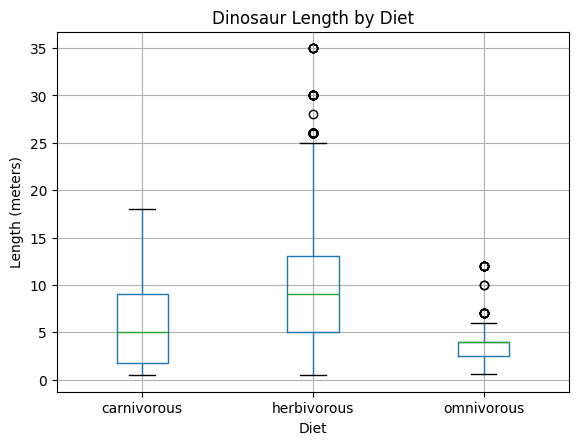

In [7]:
# 4. What is the relationship between dinosaur length and diet?
plt.figure(figsize=(10, 6))
dinosaurs_df.boxplot(column='length_m', by='diet')
plt.title('Dinosaur Length by Diet')
plt.suptitle('')
plt.xlabel('Diet')
plt.ylabel('Length (meters)')
plt.show()

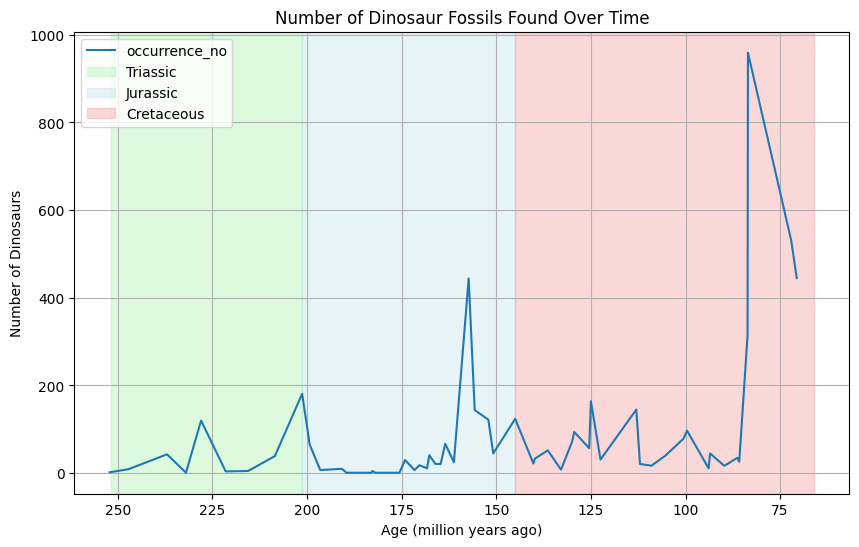

In [8]:
# 5. How did the number of dinosaurs found in each era change over time?
plt.figure(figsize=(10, 6))

# Plot the number of dinosaur fossils found over time
dinosaurs_df.groupby('max_ma')['occurrence_no'].count().plot()

# Highlight the background for each era
plt.axvspan(251.902, 201.3, color='lightgreen', alpha=0.3, label='Triassic')
plt.axvspan(201.3, 145, color='lightblue', alpha=0.3, label='Jurassic')
plt.axvspan(145, 66, color='lightcoral', alpha=0.3, label='Cretaceous')

# Add labels and title
plt.title('Number of Dinosaur Fossils Found Over Time')
plt.xlabel('Age (million years ago)')
plt.ylabel('Number of Dinosaurs')

# Add grid lines
plt.grid(True)

# Invert x-axis to show time progressing from left to right
plt.gca().invert_xaxis()

# Add legend
plt.legend()

# Show plot
plt.show()







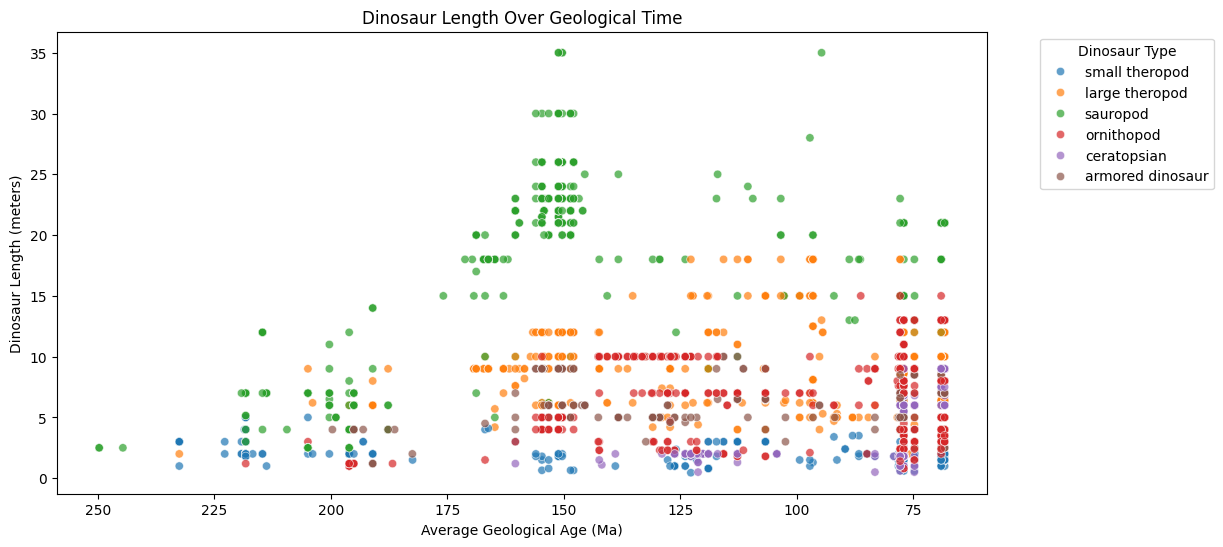

In [9]:
# Calculate the average geological age
dinosaurs_df['average_ma'] = (dinosaurs_df['max_ma'] + dinosaurs_df['min_ma']) / 2

# Filter out rows with missing length values
dinosaurs_non_missing_length = dinosaurs_df.dropna(subset=['length_m'])

# Scatter plot of average age vs. length
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dinosaurs_non_missing_length, x='average_ma', y='length_m', hue='type', alpha=0.7)
plt.title('Dinosaur Length Over Geological Time')
plt.xlabel('Average Geological Age (Ma)')
plt.ylabel('Dinosaur Length (meters)')
plt.gca().invert_xaxis()
plt.legend(title='Dinosaur Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


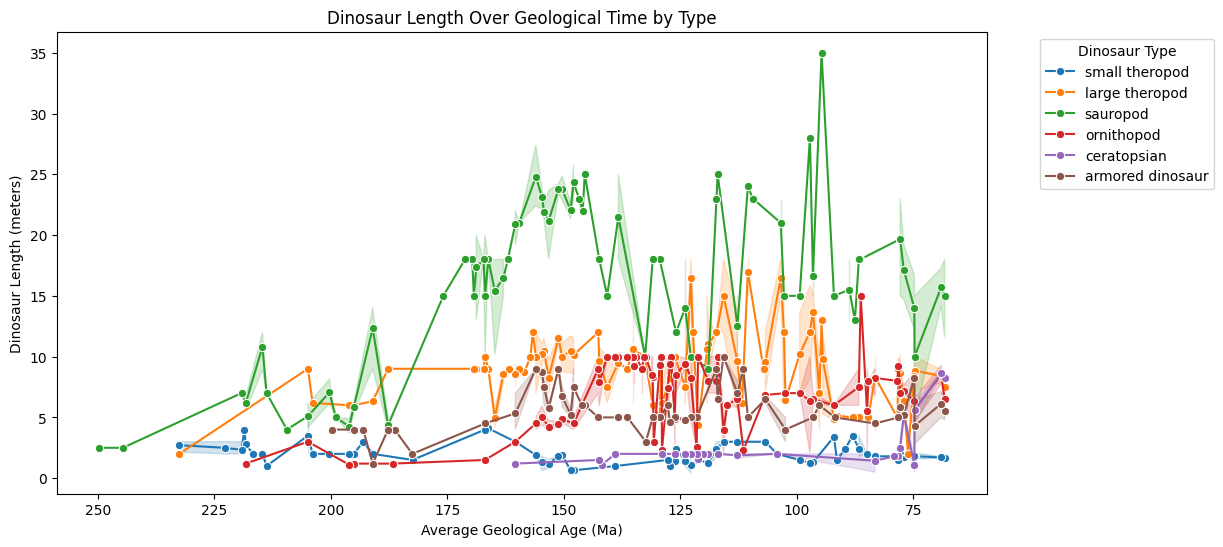

In [10]:
# Line plot of average age vs. length for each type of dinosaur
plt.figure(figsize=(12, 6))
sns.lineplot(data=dinosaurs_non_missing_length, x='average_ma', y='length_m', hue='type', marker='o')
plt.title('Dinosaur Length Over Geological Time by Type')
plt.xlabel('Average Geological Age (Ma)')
plt.ylabel('Dinosaur Length (meters)')
plt.gca().invert_xaxis()
plt.legend(title='Dinosaur Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

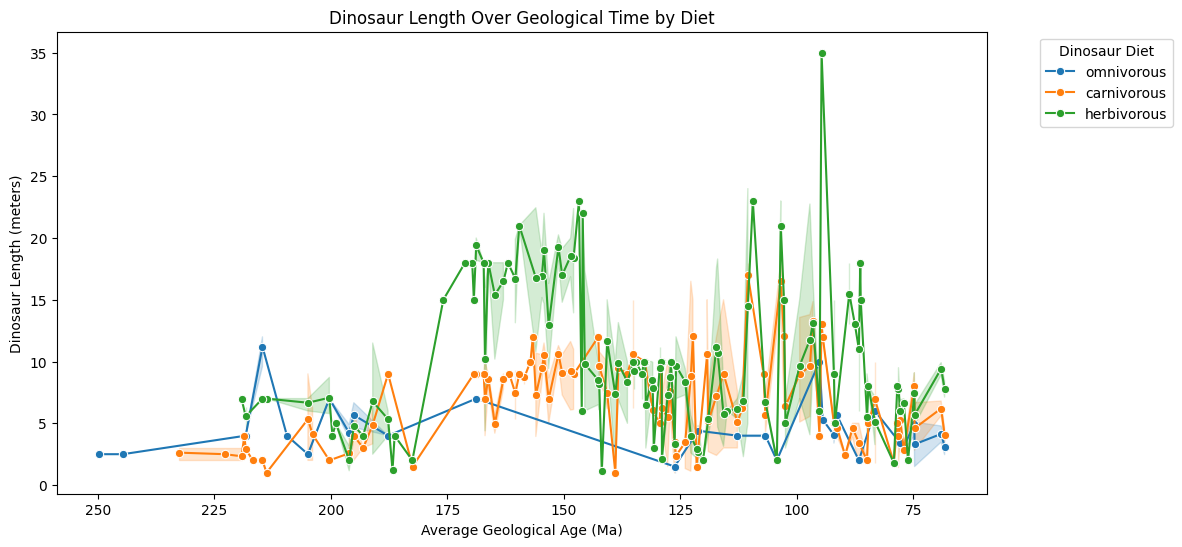

In [11]:
# Line plot of average age vs. length for each diet of dinosaur
plt.figure(figsize=(12, 6))
sns.lineplot(data=dinosaurs_non_missing_length, x='average_ma', y='length_m', hue ='diet', marker='o')
plt.title('Dinosaur Length Over Geological Time by Diet')
plt.xlabel('Average Geological Age (Ma)')
plt.ylabel('Dinosaur Length (meters)')
plt.gca().invert_xaxis()
plt.legend(title='Dinosaur Diet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()